# Results

|                 | Logistic Regression | Decision Trees | Bayes | KNN   | SVM   |
|-----------------|---------------------|----------------|-------|-------|-------|
| Accuracy score  | 76.92               | 79.28          | 68.63 | 64.49 | 49.70 |
| Precision score | 66.27               | 74.41          | 61.62 | 59.30 | 41.86 |
| Recall score    | 85.04               | 83.11          | 72.60 | 67.10 | 50.70 |
| F1 score        | 74.50               | 78.52          | 66.66 | 62.96 | 45.85 |
| AUC score       | 81.92               | 79.37          | 68.98 | 68.58 | 51.23 |

# Data

## 1. Read csv file

Read the CSV file into a pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv('loan_data_set.csv')

## 2. Fix missing values

Fill empty values in the dataframe using mean/mode of the column.

In [2]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(skipna=True), inplace=True)
df['Gender'].fillna(df['Gender'].mode(dropna=True).iloc[0], inplace=True)
df['Married'].fillna(df['Married'].mode(dropna=True).iloc[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(dropna=True).iloc[0], inplace=True)
df['Education'].fillna(df['Education'].mode(dropna=True).iloc[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode(dropna=True).iloc[0], inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mode(dropna=True).iloc[0], inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mode(dropna=True).iloc[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode(dropna=True).iloc[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode(dropna=True).iloc[0], inplace=True)

## 3. Encode labels

Replace text labels with numerical values.

In [3]:
encode_map = {
    'Male': 0,
    'Female': 1,
    'No': 0,
    'Yes': 1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3,
    'Not Graduate': 0,
    'Graduate': 1,
    'N': 0,
    'Y': 1,
}
df.replace(encode_map, inplace=True)

## 4. Drop Loan_ID column

The column is not relevant to the prediction process.

In [4]:
df.drop('Loan_ID', axis='columns', inplace=True)

## 5. Split model Input/Output columns

To calculate `X` and `Y` dataframes.

In [5]:
# input
X = df[['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History'] ]
# output
Y = df['Loan_Status']

## 6. Plot original class distribution

<AxesSubplot: ylabel='Loan_Status'>

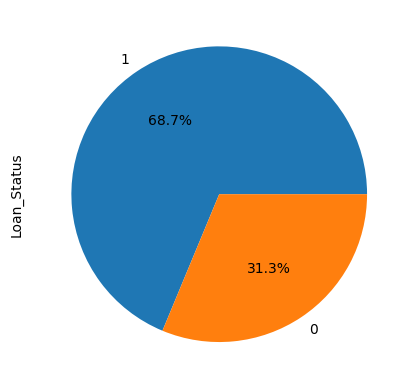

In [6]:
Y.value_counts().plot(kind='pie', autopct='%1.1f%%')

## 7. Fix class imbalance

<AxesSubplot: ylabel='Loan_Status'>

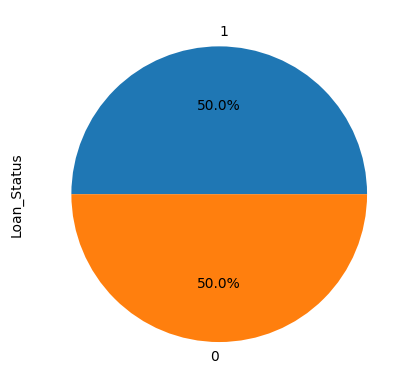

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, Y = sm.fit_resample(X, Y)
Y.value_counts().plot(kind='pie', autopct='%1.1f%%')


## 8. Split training/testing data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# Models

## Print model evaluation

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, RocCurveDisplay
import seaborn as sns

def print_model_evaluation(Y_true, Y_pred, Y_pred_proba):
    # print scores
    print(f"Accuracy: {accuracy_score(Y_pred, Y_true)*100}")
    print(f"Precision: {precision_score(Y_pred, Y_true, pos_label=0)*100}")
    print(f"Recall: {recall_score(Y_pred, Y_true, pos_label=0)*100}")
    print(f"F1: {f1_score(Y_pred, Y_true, pos_label=0)*100}")
    print(f"AUC: {roc_auc_score(Y_true, Y_pred_proba[:, 1])*100}")
    # plot confusion matrix
    cf_matrix = confusion_matrix(Y_pred, Y_true, labels=[0,1])
    sns.heatmap(cf_matrix, annot=True)
    # plot ROC curve
    RocCurveDisplay.from_predictions(Y_true, Y_pred_proba[:, 1])

## Saving models

In [10]:
import pickle

def save_model(model, modelname):
    with open(f"models/{modelname}", 'wb') as f:
        pickle.dump(model, f)

## Using a saved model

In [11]:
import pickle
def predict_result(inputvector, modelname):
    with open(f"models/{modelname}", 'rb') as f:
        model = pickle.load(f)
    return model.predict([inputvector])

## 1. Logistic regression

Accuracy: 76.92307692307693
Precision: 66.27906976744185
Recall: 85.07462686567165
F1: 74.50980392156863
AUC: 81.92771084337349


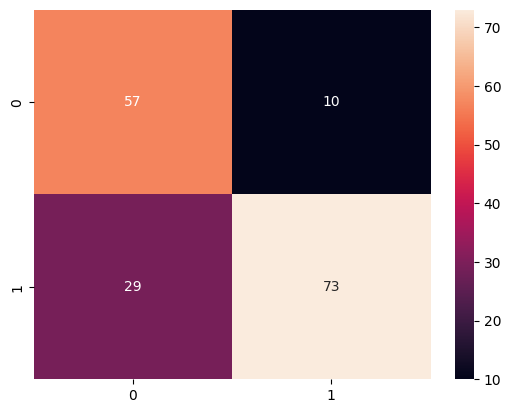

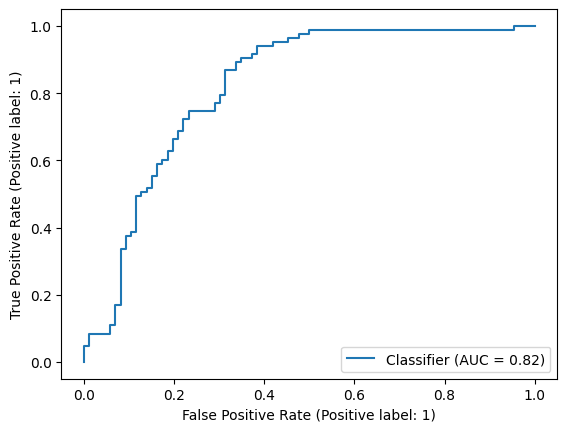

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
# train model
lr_model.fit(X_train , Y_train)
# predict on test split
Y_pred_lr = lr_model.predict(X_test)
Y_pred_lr_proba = lr_model.predict_proba(X_test)
# evaluate model
print_model_evaluation(Y_test, Y_pred_lr, Y_pred_lr_proba)

In [13]:
save_model(lr_model, 'logistic_regression')
predict_result([0,1,2,1,0,4006,1526,168,360,1], 'logistic_regression')

/home/user/Documents/MWS_S22_ADM/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## 2. Decision trees

Accuracy: 79.28994082840237
Precision: 74.4186046511628
Recall: 83.11688311688312
F1: 78.52760736196319
AUC: 79.37797702437656


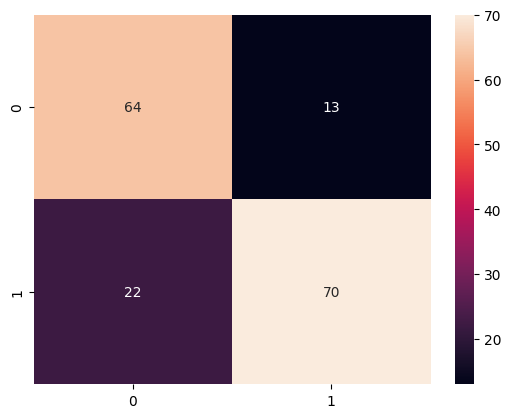

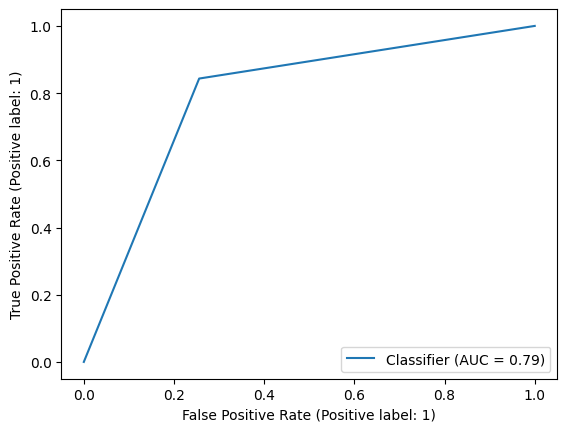

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
# train model
dt_model.fit(X_train , Y_train)
# predict on test split
Y_pred_dt = dt_model.predict(X_test)
Y_pred_dt_proba = dt_model.predict_proba(X_test)
# evaluate model
print_model_evaluation(Y_test, Y_pred_dt, Y_pred_dt_proba)

In [15]:
save_model(dt_model, 'decision_trees')
predict_result([0,1,2,1,0,4006,1526,168,360,1], 'decision_trees')

/home/user/Documents/MWS_S22_ADM/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## 3. Bayes

/home/user/Documents/MWS_S22_ADM/.venv/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Accuracy: 68.63905325443787
Precision: 61.627906976744185
Recall: 72.6027397260274
F1: 66.66666666666667
AUC: 68.98991314093583


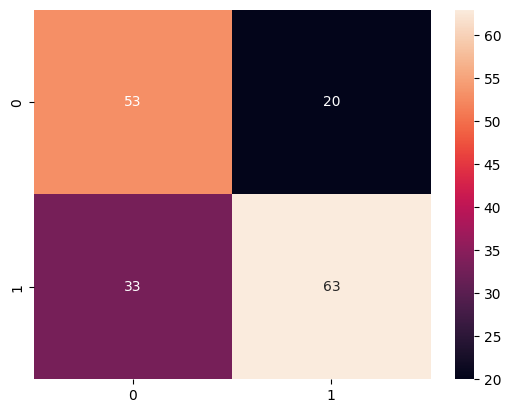

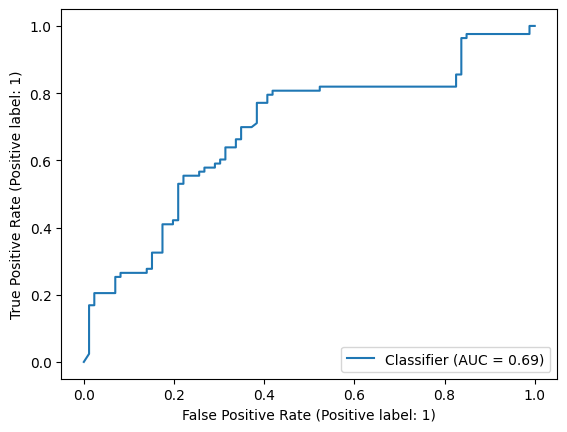

In [16]:
from sklearn.naive_bayes import CategoricalNB

bayes_model = CategoricalNB(alpha=0)
# train model
bayes_model.fit(X_train , Y_train)
# predict on test split
Y_pred_bayes = bayes_model.predict(X_test)
Y_pred_bayes_proba = bayes_model.predict_proba(X_test)
# evaluate model
print_model_evaluation(Y_test, Y_pred_bayes, Y_pred_bayes_proba)

In [17]:
save_model(bayes_model, 'bayes')
predict_result([0,1,2,1,0,4006,1526,168,360,1], 'bayes')

/home/user/Documents/MWS_S22_ADM/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([1])

## KNN

Accuracy: 64.49704142011834
Precision: 59.30232558139535
Recall: 67.10526315789474
F1: 62.96296296296296
AUC: 68.58363687307369


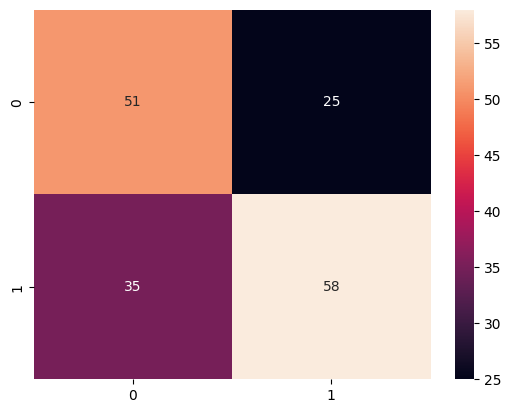

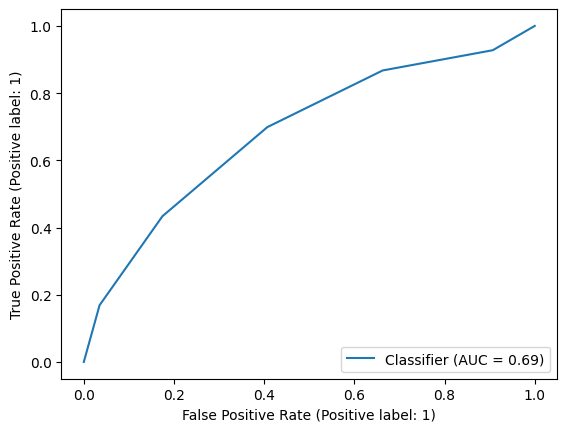

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
# train model
knn_model.fit(X_train , Y_train)
# predict on test split
Y_pred_knn = knn_model.predict(X_test)
Y_pred_knn_proba = knn_model.predict_proba(X_test)
# evaluate model
print_model_evaluation(Y_test, Y_pred_knn, Y_pred_knn_proba)

In [19]:
save_model(knn_model, 'knn')
predict_result([0,1,2,1,0,4006,1526,168,360,1], 'knn')

/home/user/Documents/MWS_S22_ADM/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

## SVM

Accuracy: 49.70414201183432
Precision: 41.86046511627907
Recall: 50.70422535211267
F1: 45.859872611464965
AUC: 51.232838330064446


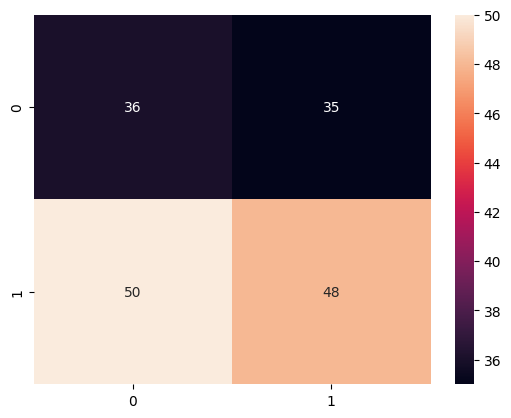

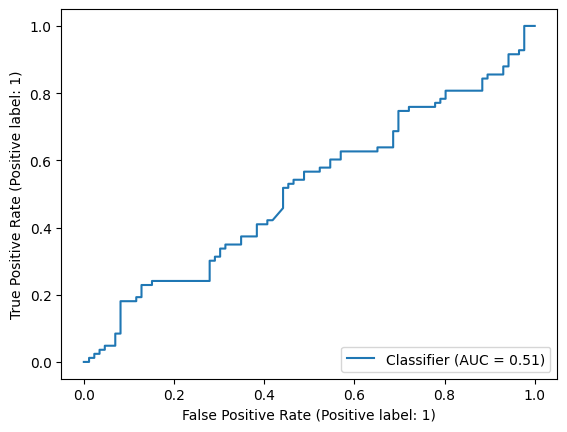

In [20]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
# train model
svm_model.fit(X_train , Y_train)
# predict on test split
Y_pred_svm = svm_model.predict(X_test)
Y_pred_svm_proba = svm_model.predict_proba(X_test)
# evaluate model
print_model_evaluation(Y_test, Y_pred_svm, Y_pred_svm_proba)

In [21]:
save_model(svm_model, 'svm')
predict_result([0,1,2,1,0,4006,1526,168,360,1], 'svm')

/home/user/Documents/MWS_S22_ADM/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])